# Pandas and Data Manipulation

Copyright 2018 Amazon.com, Inc. or its affiliates. All Rights Reserved.

Licensed under the Apache License, Version 2.0 (the "License"). You may not use this file except
in compliance with the License. A copy of the License is located at

https://aws.amazon.com/apache-2-0/

or in the "license" file accompanying this file. This file is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the
specific language governing permissions and limitations under the License.

## Write CSV

Create CSV. Paste multiline bash commands using `%%bash`.

In [1]:
%%bash
cat > donuts.csv << 'CSV_END'
CA,Raspberry,6
WA,Glazed,6
WA,Chocolate,1
OR,Chocolate,1
OR,Raspberry,1
CA,Apple,12
WA,Chocolate,6
WA,Apple,12
OR,Apple,12
OR,Glazed,6
CSV_END

You can type one-line shell commands using `!`.

In [2]:
!ls -l donuts.csv

-rw-rw-r-- 1 ec2-user ec2-user 135 Dec  8 23:46 donuts.csv


## Reading CSV

In [3]:
%matplotlib inline
import pandas as pd

In [4]:
df = pd.read_csv("donuts.csv", names=["State","Donut","Quantity"])

In [5]:
df

,State,Donut,Quantity
0,CA,Raspberry,6
1,WA,Glazed,6
2,WA,Chocolate,1
3,OR,Chocolate,1
4,OR,Raspberry,1
5,CA,Apple,12
6,WA,Chocolate,6
7,WA,Apple,12
8,OR,Apple,12
9,OR,Glazed,6


## Inspecting Data

In [6]:
df.head()

,State,Donut,Quantity
0,CA,Raspberry,6
1,WA,Glazed,6
2,WA,Chocolate,1
3,OR,Chocolate,1
4,OR,Raspberry,1


## Selecting Single Column

In [7]:
df.Quantity

0     6
1     6
2     1
3     1
4     1
5    12
6     6
7    12
8    12
9     6
Name: Quantity, dtype: int64

## Plotting Single Columns

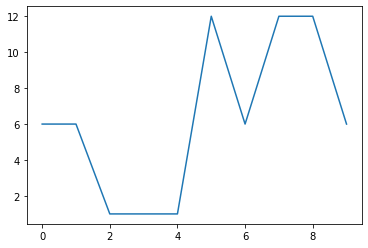

In [8]:
df.Quantity.plot()

## Plotting Frequencies

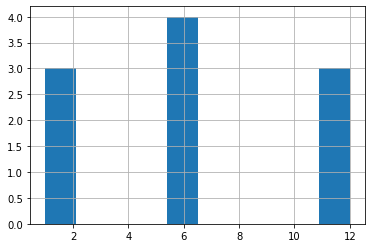

In [9]:
df.Quantity.hist()

In [10]:
df

,State,Donut,Quantity
0,CA,Raspberry,6
1,WA,Glazed,6
2,WA,Chocolate,1
3,OR,Chocolate,1
4,OR,Raspberry,1
5,CA,Apple,12
6,WA,Chocolate,6
7,WA,Apple,12
8,OR,Apple,12
9,OR,Glazed,6


## Selecting Columns

Slice data by column

In [11]:
df[['State','Quantity']]

,State,Quantity
0,CA,6
1,WA,6
2,WA,1
3,OR,1
4,OR,1
5,CA,12
6,WA,6
7,WA,12
8,OR,12
9,OR,6


## Selecting Rows

Slice by row

In [12]:
df[df.Quantity == 1]

,State,Donut,Quantity
2,WA,Chocolate,1
3,OR,Chocolate,1
4,OR,Raspberry,1


## Crosstab

In [13]:
pd.crosstab(df.State, df.Quantity)

Quantity,1,6,12
State,,,
CA,0,1,1
OR,2,1,1
WA,1,2,1


In [14]:
pd.crosstab(df.State, df.Donut)

Donut,Apple,Chocolate,Glazed,Raspberry
State,,,,
CA,1,0,0,1
OR,1,1,1,1
WA,1,2,1,0


In [15]:
pd.crosstab(df.State, df.Donut, df.Quantity, aggfunc=sum, margins=True)

Donut,Apple,Chocolate,Glazed,Raspberry,All
State,,,,,
CA,12.0,NaN,NaN,6.0,18
OR,12.0,1.0,6.0,1.0,20
WA,12.0,7.0,6.0,NaN,25
All,36.0,8.0,12.0,7.0,63


In [16]:
pd.crosstab(df.State, df.Donut, df.Quantity, aggfunc=sum, margins=True, normalize=True)

Donut,Apple,Chocolate,Glazed,Raspberry,All
State,,,,,
CA,0.190476,0.000000,0.000000,0.095238,0.285714
OR,0.190476,0.015873,0.095238,0.015873,0.317460
WA,0.190476,0.111111,0.095238,0.000000,0.396825
All,0.571429,0.126984,0.190476,0.111111,1.000000


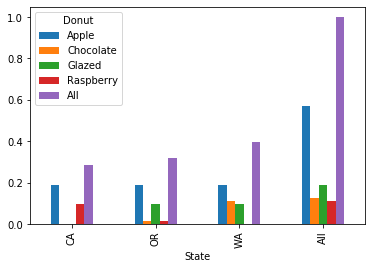

In [17]:
pd.crosstab(df.State, df.Donut, df.Quantity, aggfunc=sum, margins=True, 
            normalize=True).plot(kind='bar')